In [212]:
# DATA70132 Assessment 2
# Author: Jungmin Seo 
# Submitted on March 24th (automatic extention granted; original due on March 17th)
# Assessment 2: Using the vertebral column data, apply at least one unsupervised and one supervised classification procedure. Produce a short report. 

%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import sklearn as sk
from sklearn import svm 
from sklearn import tree
from sklearn import discriminant_analysis
from matplotlib.colors import ListedColormap



In [214]:
# Count the number of Abnormal and Normal Patients 
db['class'].value_counts()

AB    210
NO    100
Name: class, dtype: int64

In [215]:
# Check if any missing value

db.isnull().any()


pelvic incidence              False
pelvic tilt                   False
lumbar lordosis angle         False
sacral slope                  False
pelvic radius                 False
grade of spondylolisthesis    False
class                         False
dtype: bool

In [216]:
db.describe()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496484,17.542903,51.930710,42.953871,117.920548,26.296742
std,17.236109,10.008140,18.553766,13.422748,13.317629,37.558883
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-11.060000
25%,46.432500,10.667500,37.000000,33.347500,110.710000,1.600000
50%,58.690000,16.360000,49.565000,42.405000,118.265000,11.765000
75%,72.880000,22.120000,63.000000,52.692500,125.467500,41.285000
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000


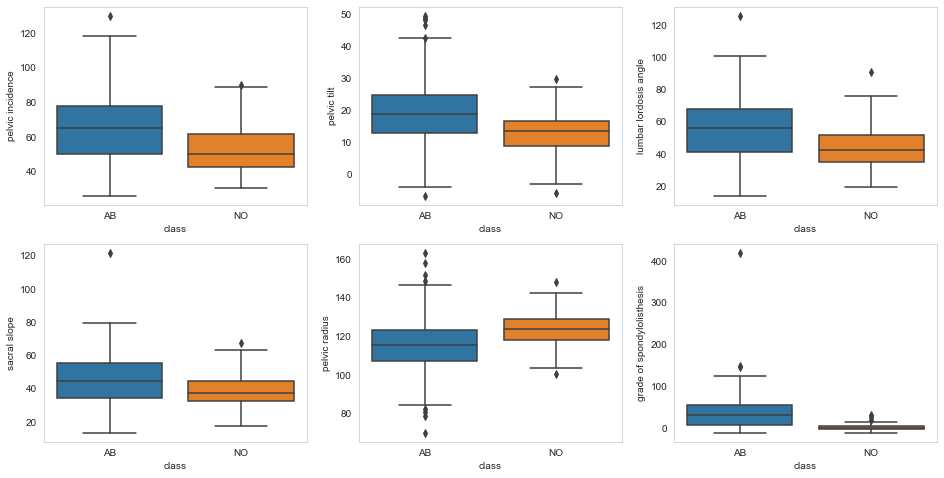

In [217]:
# Bar plot 

fig, axes = plt.subplots (2, 3, figsize = (16,8))


sns.boxplot(x = "class",
            y = "pelvic incidence",
            data = db,
            ax=axes[0,0]);


sns.boxplot(x = "class",
            y = "pelvic tilt",
            data = db,
            ax=axes[0,1]);


sns.boxplot(x = "class",
            y = "lumbar lordosis angle",
            data = db,
            ax=axes[0,2]);

sns.boxplot(x = "class",
            y = "sacral slope",
            data = db,
            ax=axes[1,0]);

sns.boxplot(x = "class",
            y = "pelvic radius",
            data = db,
            ax=axes[1,1]);

sns.boxplot(x = "class",
            y = "grade of spondylolisthesis",
            data = db,
            ax=axes[1,2]);

    
plt.show()




In [218]:
# vertebral_column_data.txt list biomechanical attributes together with whether a patient was classified as normal or ab- normal.
# column names: pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis.

# The columns that we will be making predictions with.
x_columns = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle','sacral slope', 'pelvic radius', 'grade of spondylolisthesis']
# The column that we want to predict.
y_columns = ['class']


Text(0, 0.5, 'pelvic_tilt')

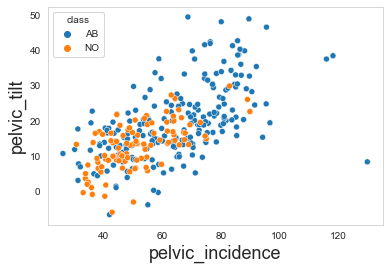

In [219]:
# Scatter plot by selecting first two features

scatter = sns.scatterplot(x = "pelvic incidence", y = "pelvic tilt", data = db, hue="class")
plt.xlabel('pelvic_incidence', fontsize=18)
plt.ylabel('pelvic_tilt', fontsize=18)



In [220]:
# Import LabelEncoder

from sklearn import preprocessing 

# creating labelEncoder

le = preprocessing.LabelEncoder()

# Converting string labels into numbers

db["class"] = le.fit_transform(db["class"])




In [221]:
# Split the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(db[x_columns], db[y_columns], test_size = 0.25, random_state=0)

## Supervised Classification Method

### Linear Discriminant Analysis (Support Vector Machine - Linear)

In [362]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear', C = 1)
svclassifier.fit(X_train, y_train.values.ravel())

SVC(C=1, kernel='linear')

In [363]:
# Making predictions

y_pred_svc = svclassifier.predict(X_test)

In [364]:
# get the separating hyperplane 

In [365]:
# Get the separating hyperplane
w = svclassifier.coef_[0]
a = - w[0] / w[1]
xx = np.linspace(20, 120)
yy = a * xx - (svclassifier.intercept_[0]) / w[1]


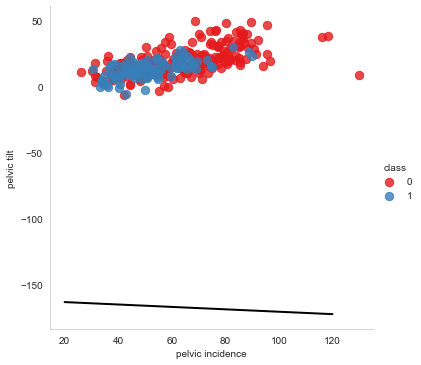

In [366]:
# Plot the hyperplane
# Plot the hyperplane

sns.lmplot(x='pelvic incidence', y='pelvic tilt', data=db, hue='class', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')



In [367]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))


[[47  7]
 [ 6 18]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        54
           1       0.72      0.75      0.73        24

    accuracy                           0.83        78
   macro avg       0.80      0.81      0.81        78
weighted avg       0.84      0.83      0.83        78



### K-Nearest Neighbor

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train.values.ravel())


KNeighborsClassifier(n_neighbors=2)

In [79]:
#Predict the response for test dataset

y_pred_knn = knn.predict(X_test)


Text(0.5, 1.0, 'Knn_Predicted')

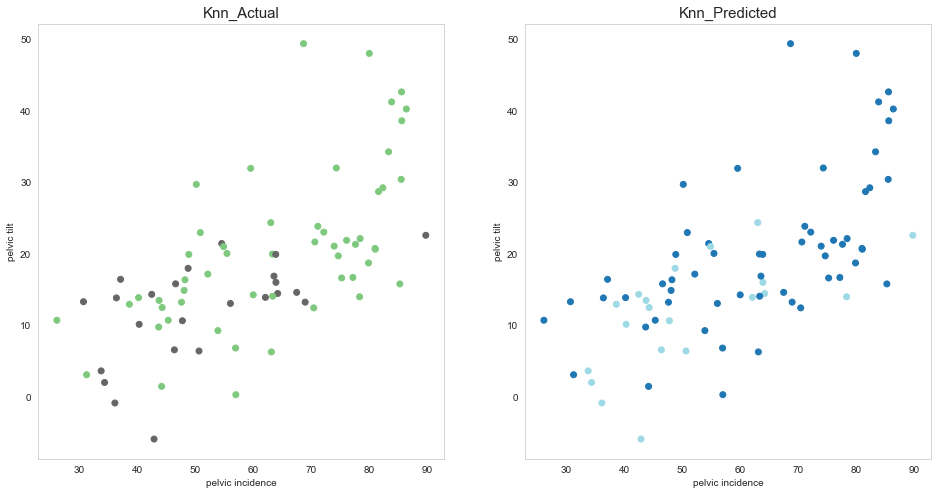

In [80]:
# Plot Knn Results 

fig, axes = plt.subplots(1, 2, figsize = (16,8))

axes[0].scatter(X_test.iloc[:,0], X_test.iloc[:,1], c = y_test['class'], cmap = 'Accent')

axes[1].scatter(X_test.iloc[:,0], X_test.iloc[:,1], c = y_pred_knn, cmap = 'tab20')

axes[0].set_xlabel('pelvic incidence')
axes[0].set_ylabel('pelvic tilt')

axes[1].set_xlabel('pelvic incidence')
axes[1].set_ylabel('pelvic tilt')


axes[0].set_title('Knn_Actual', fontsize = 15)
axes[1].set_title('Knn_Predicted', fontsize = 15)


In [81]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

Accuracy Knn: 0.7948717948717948
[[48  6]
 [10 14]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        54
           1       0.70      0.58      0.64        24

    accuracy                           0.79        78
   macro avg       0.76      0.74      0.75        78
weighted avg       0.79      0.79      0.79        78



In [ ]:
# make prediction

pi = input('Enter patient pelvic incidence: ')
pt = input('Enter patient pelvic tilt: ')
lla = input('Enter patient : lumbar lordosis angle')
ss = input('Enter patient sacral slope: ')
pr = input('Enter patient pelvic radius: ')
gs = input('Enter patient grade of spondylolisthesis: ')
dataClass = knn.predict([[pi,pt,lla,ss,pr,gs]])
print('Prediction: ')

if dataClass == 0:
    print('Abnormal')
elif dataClass == 1:
    print('Normal')
else:
    print('Unknown')


## Unsupervised Learning 

### K-means Clustering

In [87]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state = 111)

kmeans.fit(X_train)

y_pred_km = kmeans.predict(X_test)

centers = kmeans.cluster_centers_

print(centers)

[[ 53.50837209  14.0844186   44.04127907  39.4244186  117.60598837
    9.81639535]
 [ 80.72783333  26.75616667  73.209       53.972      117.232
   77.75983333]]


Text(0.5, 1.0, 'Predicted')

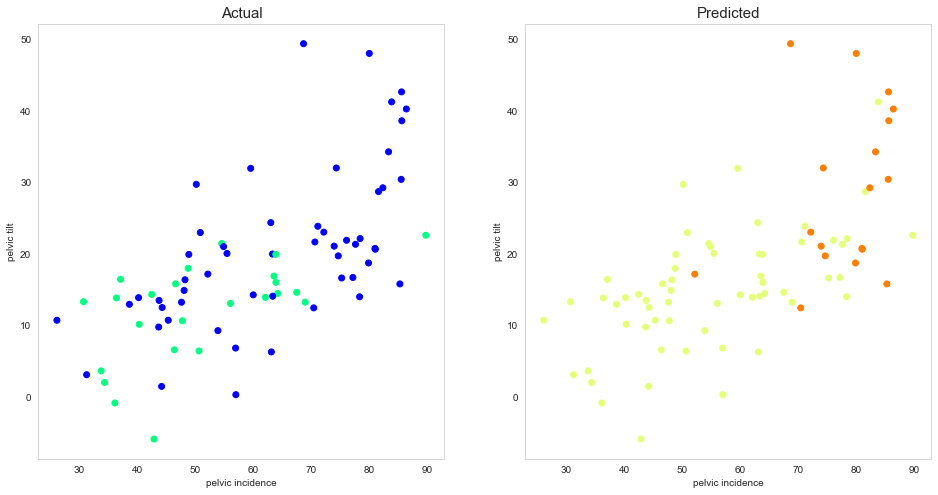

In [203]:
# compare the original data with Kmeans clustering results



fig, axes = plt.subplots(1, 2, figsize = (16,8))

axes[0].scatter(X_test.iloc[:,0], X_test.iloc[:,1], c = y_test['class'], cmap = 'winter')

axes[1].scatter(X_test.iloc[:,0], X_test.iloc[:,1], c = y_pred_km, cmap = 'Wistia')

axes[0].set_title('Actual', fontsize = 15)

axes[0].set_xlabel('pelvic incidence')
axes[0].set_ylabel('pelvic tilt')

axes[1].set_xlabel('pelvic incidence')
axes[1].set_ylabel('pelvic tilt')



axes[1].set_title('Predicted', fontsize = 15)

In [204]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics

print(confusion_matrix(y_test,y_pred_km))
print(classification_report(y_test,y_pred_km))

[[36 18]
 [24  0]]
              precision    recall  f1-score   support

           0       0.60      0.67      0.63        54
           1       0.00      0.00      0.00        24

    accuracy                           0.46        78
   macro avg       0.30      0.33      0.32        78
weighted avg       0.42      0.46      0.44        78

